In [1]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

# User settings

In [2]:
database_name = 'sociology-jstor'
definitions_of_death = ['death1','death2','death3']

In [3]:
plt.style.use('grayscale')
linestyles = ['-','--','-.','dotted']

# general imports

In [4]:
cysum = load_variable("%s.tysum" % database_name)

In [5]:
docs = get_cnt("%s.doc" % database_name)

Loaded keys: dict_keys(['fj.fy', 'fy', 'c', 'c.fy'])
Available keys: ['a', 'a.c', 'a.fj.fy', 'c', 'c.c', 'c.fa', 'c.fj', 'c.fy', 'c.t', 'fa', 'fa.fj.fy', 'fj', 'fj.fy', 'fj.t', 'fy', 'fy.t', 't']


In [6]:
cits = get_cnt("%s.ind" % database_name)

Loaded keys: dict_keys(['fj.fy', 'fy', 'c', 'c.fy'])
Available keys: ['a', 'a.c', 'a.fj.fy', 'c', 'c.c', 'c.fa', 'c.fj', 'c.fy', 'c.t', 'fa', 'fa.fj.fy', 'fj', 'fj.fy', 'fj.t', 'fy', 'fy.t', 't']


In [7]:
tysum = load_variable("%s.tysum" % database_name)

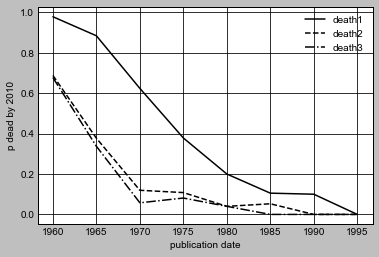

In [8]:
dying_count = defaultdict(lambda:defaultdict(int))

step = 5

for x in tysum.values():
    for dk in definitions_of_death:
        dying_count[dk][(
            (x['first']//step)*step,
            x[dk] is not None
        )] += 1

counts = range(1960,2000,step)

for i,dk in enumerate(definitions_of_death):
    probs = [ dying_count[dk][(c,True)]/(dying_count[dk][(c,True)]+dying_count[dk][(c,False)]) if (dying_count[dk][(c,True)]+dying_count[dk][(c,False)]>0) else 0 for c in counts ]
    plt.plot(counts,probs,label=dk,linestyle=linestyles[i], color='black')

plt.xlabel("publication date")
plt.ylabel("p dead by 2010")
plt.legend();

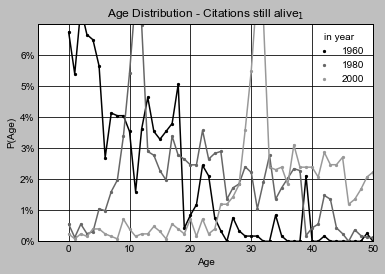

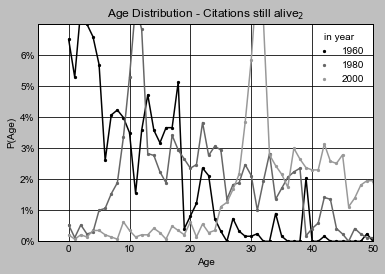

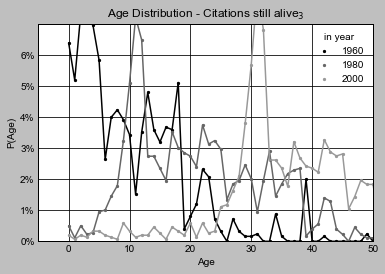

In [9]:

birth_key = 'first'

for death_key in definitions_of_death:

    
    for YRLOOK in range(1960,2020,20):

        born = lambda x: x[birth_key]
        died = lambda x: x[death_key]


        bdays = [YRLOOK-born(x) for x in cysum.values() if (((died(x) is None) or (died(x) >= YRLOOK)) and born(x) <= YRLOOK)]
        yrs_none = Counter(bdays)

        num = len(bdays)

        years = range(0,100,1)
        props = np.array([yrs_none[x] for x in years])
        props = props/np.sum(props)
        props *= 100

        plt.plot(
            years,
            props,
            #label="%s (%s)" % (YRLOOK,num)
        );
        plt.scatter(years,props,s=5, label=YRLOOK)

    plt.title("Age Distribution - Citations still alive$_%s$" % (
        re.findall('[0-9]+',death_key)[0]
    ))
    plt.xlim((-5,50))
    plt.ylim((0,7))
    plt.yticks(
        range(0,7,1),
        ["%s%%"%x for x in range(0,7,1)]
    )
    plt.ylabel("P(Age)")
    plt.xlabel("Age")
    plt.legend(fancybox=True, title='in year')

    save_figure("%s.Term age distribution for %s" % (database_name,death_key))
    #plt.legend()
    plt.show()

In [10]:
birth_key = 'pub'

born = lambda x: x[birth_key]

YRLOOK = 1990

for dki, death_key in enumerate(definitions_of_death):
    died = lambda x: x[death_key]
    bdays = [YRLOOK-born(x) for x in cysum.values() if (((died(x) is None) or (died(x) >= YRLOOK)) and born(x) <= YRLOOK)]
    yrs_none = Counter(bdays)

    num = len(bdays)

    years = range(0,100,1)
    props = np.array([yrs_none[x] for x in years])
    props = props/np.sum(props)
    props *= 100

    plt.plot(
        years,
        props,
        label=death_key,
        linestyle = linestyles[dki]
        #label="%s (%s)" % (YRLOOK,num)
    );
    #plt.scatter(years,props,s=5)

plt.title("Age Distribution - Citations still alive in 2010")
plt.xlim((-5,50))
plt.ylim((0,7))
plt.yticks(
    range(0,7,1),
    ["%s%%"%x for x in range(0,7,1)]
)
plt.ylabel("Percent of citations at age")
plt.xlabel("Age")

save_figure("%s.Citation age distribution by death definition" % database_name)
plt.legend()
plt.show()

KeyError: 'pub'

In [ ]:
birth_key = 'first'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

YRLOOK = 2010

bdays = [YRLOOK-born(x) for x in aysum.values() if (((died(x) is None) or (died(x) >= YRLOOK)) and born(x) <= YRLOOK)]
yrs_none = Counter(bdays)

num = len(bdays)

years = range(0,100,1)
year_died_counts = np.array([yrs_none[x] for x in years])
total = np.sum(year_died_counts)
props = year_died_counts/np.sum(year_died_counts)

se = np.sqrt((props * (1-props))/total)

percents = props*100

plt.plot(
    years,
    percents,
    #label="%s (%s)" % (YRLOOK,num)
);
plt.scatter(years,percents,s=5)
#plt.errorbar(years,percents,se*100)

plt.title("Age Distribution - Authors still alive$_2$ in 2010")
plt.xlim((-5,50))
plt.ylim(0,7)
plt.yticks(
    range(0,7,1),
    ["%s%%"%x for x in range(0,7,1)]
)
plt.ylabel("Percent of authors at age ")
plt.xlabel("Age")

save_figure("auth.agedist")

#plt.legend()
plt.show()

In [ ]:
birth_key = 'first'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

years = range(1930, 2020)
pdied = {
    y: Counter( (died(x) is not None) for x in aysum.values() if x['first']==y ) + 
        Counter( "total" for x in aysum.values() if x['first']==y )
    for y in years
}

props = np.array([ pdied[y][True]/pdied[y]['total'] if pdied[y]['total'] else float('nan') for y in years ])


plt.plot(
    years,
    props*100,
    #label="%s (%s)" % (YRLOOK,num)
);
plt.scatter(years,props*100,s=5)
#plt.errorbar(years,percents,se*100)

plt.title("Proportion authors dead$_2$, by cohort")
plt.yticks(
    range(0,110,10),
    ["%s%%"%x for x in range(0,110,10)]
)
plt.ylabel("Percent dead$_2$")
plt.xlabel("Date of first publication")

save_figure("auth.prop dead by cohort")

#plt.legend()
plt.show()

In [ ]:
birth_key = 'pub'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

years = range(1950, 2020)
pdied = {
    y: Counter( (died(x) is not None) for x in cysum.values() if x['first']==y ) + 
        Counter( "total" for x in cysum.values() if x['first']==y )
    for y in years
}

props = np.array([ pdied[y][True]/pdied[y]['total'] for y in years ])


plt.plot(
    years,
    props*100,
    #label="%s (%s)" % (YRLOOK,num)
);
plt.scatter(years,props*100,s=5)
#plt.errorbar(years,percents,se*100)

plt.title("Proportion citations dead$_2$, by cohort")
plt.yticks(
    range(0,110,10),
    ["%s%%"%x for x in range(0,110,10)]
)
plt.ylabel("Percent dead$_2$")
plt.xlabel("Date of publication")


save_figure("cit.prop dead by cohort")

#plt.legend()
plt.show()

In [ ]:
cc = Counter(x['first'] - x['pub'] for x in cysum.values() )
x = range(0,20,1)
plt.bar(
    x,
    [cc[xx] for xx in x],
    1,
    alpha=0.1
)

plt.bar(
    x,
    [cc[xx] for xx in x],
    1,
    color='black',
    fill=False,
    linestyle='-'
)

ys = range(0,70000, 10000)
plt.yticks(
    ys,
    ["%dk"%(x//1000) for x in ys]
)

plt.xticks(
    range(0,21,1)
);

plt.grid(False, axis='x')

plt.ylabel("Number of works")
plt.xlabel("Number of years until first citation");

save_figure("SB-time lag")